We will start by importing the necessary libraries. We will use Numpy along with Tensorflow for computations and Matplotlib for plotting.

In [12]:

import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings("ignore")

In order to make the random numbers predictable, we will define fixed seeds for both Numpy and Tensorflow.

In [2]:
np.random.seed(101) 
tf.set_random_seed(101) 

Now, let us generate some random data for training the Linear Regression Model.



In [3]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

Let us visualize the training data.



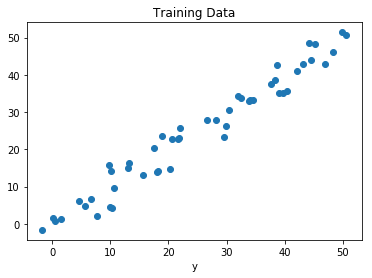

In [13]:

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

Now we will start creating our model by defining the placeholders X and Y, so that we can feed our training examples X and Y into the optimizer during the training process.

In [5]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 


Now we will declare two trainable Tensorflow Variables for the Weights and Bias and initializing them randomly using np.random.randn().


In [6]:

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

Now we will define the hyperparameters of the model, the Learning Rate and the number of Epochs.


In [7]:

learning_rate = 0.01
training_epochs = 1000

Now, we will be building the Hypothesis, the Cost Function, and the Optimizer. We won’t be implementing the Gradient Descent Optimizer manually since it is built inside Tensorflow. After that, we will be initializing the Variables.

In [8]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

Now we will begin the training process inside a Tensorflow Session.

In [9]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459417 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.4453845 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.421903 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.384856 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W =

Now let us look at the result.


In [10]:

# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 



Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658 



Note that in this case both the Weight and bias are scalars. This is because, we have considered only one dependent variable in out training data. If we have m dependent variables in our training dataset, the Weight will be an m-dimensional vector while bias will be a scalar.

Finally, we will plot our result.

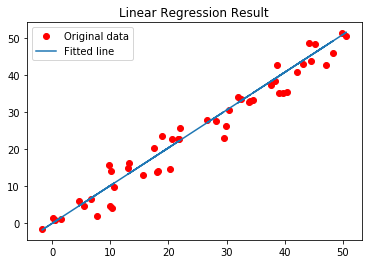

In [11]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 